# Predicting credit card debt from UCI dataset

## by Christopher Forsythe, Daniel Deleon, Jose Garcia

### Introduction

### Exploration

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("C:/Users/AliKas/Downloads/default_cc_train.csv")

Looking at a summary of the data

In [3]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,14977.844760,167244.387200,1.604360,1.853920,1.552920,35.461320,-0.019000,-0.134400,-0.16464,-0.218280,...,43300.725640,40275.052440,38915.765600,5672.70844,5.866362e+03,5220.811240,4821.460360,4838.123440,5209.749440,0.220560
std,8662.539837,129543.574364,0.488998,0.789408,0.521776,9.197019,1.119665,1.194719,1.19609,1.167651,...,64376.490314,60640.453002,59585.622139,16002.16693,2.011322e+04,17116.197319,15194.636443,15246.074819,17747.788739,0.414633
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.00000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7449.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,2314.750000,1747.000000,1240.000000,990.00000,8.360000e+02,390.000000,299.000000,264.000000,107.750000,0.000000
50%,14987.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.00000,0.000000,...,19119.500000,18146.000000,17115.500000,2102.50000,2.016000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22467.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.00000,0.000000,...,54591.500000,50245.500000,49319.250000,5011.00000,5.000000e+03,4513.000000,4023.750000,4057.250000,4006.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.00000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.00000,1.227082e+06,896040.000000,528897.000000,426529.000000,528666.000000,1.000000


Lets check to see if there is any NA's in the dataset

In [4]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

I want to get an idea of the age distribution to see if maybe it could have an effect on defaulting on payments. I ended up removing ages > 73 to make the bins better because there are only 3 people older than 73 so I didn't have enough data. This data seems to not really have any significant correlation

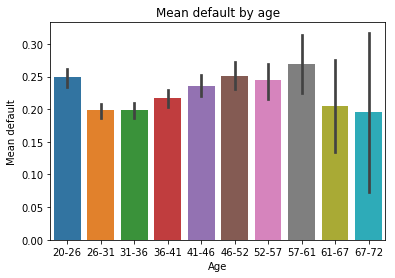

In [5]:
labels = ["20-26", "26-31", "31-36", "36-41", "41-46", "46-52", "52-57", "57-61", "61-67","67-72"]
binned_ages = pd.cut(df[df.AGE < 73].AGE, 10, labels=labels)
sns.barplot(binned_ages, 'default.payment.next.month', data=df[df.AGE < 73], )
plt.title("Mean default by age")
plt.ylabel("Mean default")
plt.xlabel("Age")
plt.show()

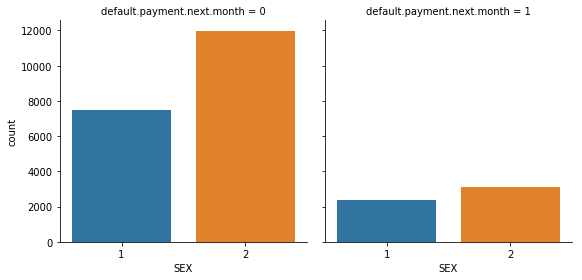

In [6]:
sns.factorplot(x='SEX', col='default.payment.next.month', data=df, kind='count')
plt.show()

In [ ]:
Here we can see the amount of people 

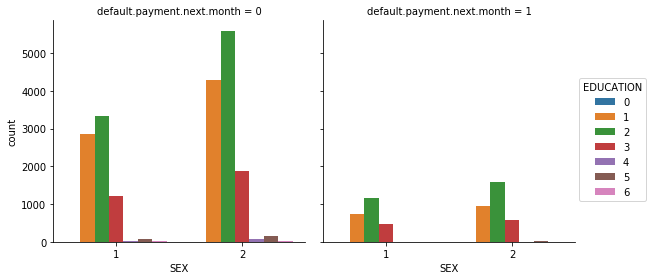

In [7]:
sns.factorplot(x='SEX', hue='EDUCATION', col='default.payment.next.month', data=df, kind='count')
plt.show()

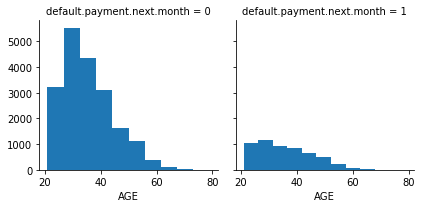

In [8]:
g = sns.FacetGrid(df, col = 'default.payment.next.month')
g.map(plt.hist, 'AGE')
plt.show()

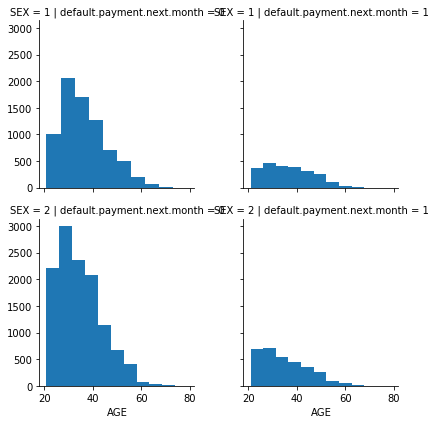

In [9]:
g = sns.FacetGrid(df, col = 'default.payment.next.month', row = 'SEX')
g.map(plt.hist, 'AGE')
plt.show()

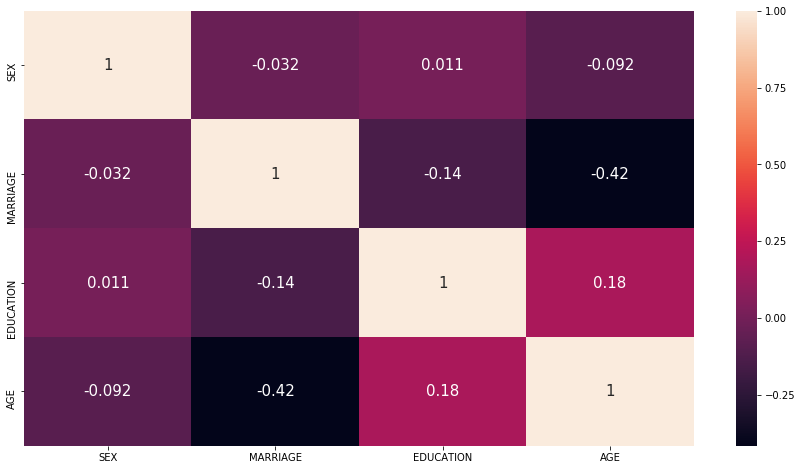

In [10]:
n_df = df[['SEX','MARRIAGE', 'EDUCATION', 'AGE']].copy()
corr = n_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws={"size": 15})
plt.show()

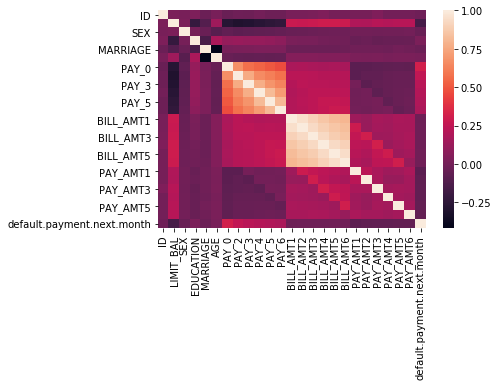

In [12]:
sns.heatmap(df.corr())

### Preprocessing

### Experiments/Dimensionality Reduction

### Ensemble Learning

### SVM

In [22]:
X = df.iloc[:,0:24]
y = df["default.payment.next.month"]

In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size = 0.5, train_size = .5 )
svm_clf = SVC()
svm_clf.fit(X_train_val, y_train_val)
y_pred = svm_clf.predict(X_test)
print(svm_clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.77744


### Gridsearch

### Analyses

### Performance